In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
dataset = pd.read_csv('placement.csv')
dataset.head()

cgpa  package
0  6.89     3.26
1  5.12     1.98
2  7.82     3.25
3  7.42     3.67
4  6.94     3.57

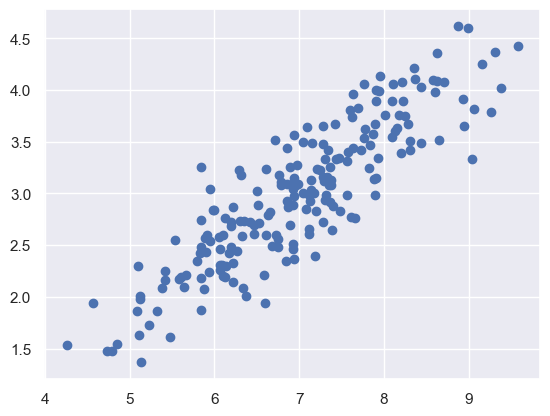

In [4]:
plt.scatter(dataset['cgpa'], dataset['package'])

In [35]:
# split the data into independent variable and dependent variable
x = dataset.iloc[:,0:1]
y = dataset.iloc[:,-1]

In [36]:
x.head()

cgpa
0  6.89
1  5.12
2  7.82
3  7.42
4  6.94

In [37]:
y.head()

0    3.26
1    1.98
2    3.25
3    3.67
4    3.57
Name: package, dtype: float64

In [8]:
dataset.isnull().sum()

cgpa       0
package    0
dtype: int64

<AxesSubplot:ylabel='cgpa'>

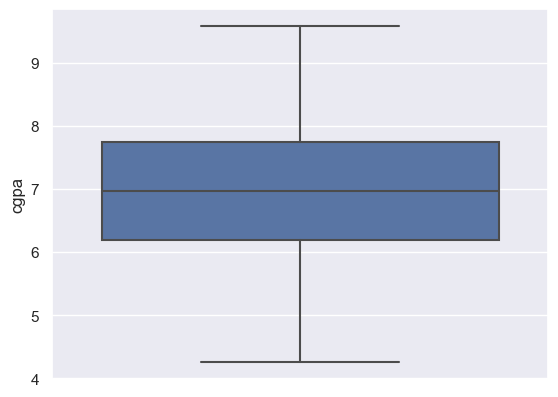

In [9]:
sns.boxplot(y='cgpa', data=dataset)

In [1]:
# split the data into training and test
# training is for building the model
# test data is for evaluation with predicted data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

NameError: name 'x' is not defined

In [39]:
x_train.shape

(160, 1)

In [40]:
x_test.shape

(40, 1)

In [42]:
x_test

cgpa
18   6.94
170  6.22
107  6.33
98   7.69
177  7.09
182  5.88
5    7.89
146  6.07
12   8.94
152  7.37
61   5.48
125  7.33
180  6.19
154  7.08
80   7.63
7    6.75
33   6.35
130  6.68
37   5.90
74   6.85
183  7.28
145  5.84
45   7.87
159  8.71
60   5.61
123  5.10
179  7.14
185  6.31
122  5.12
44   5.09
16   6.84
55   8.20
150  6.30
111  5.42
22   6.14
189  8.11
129  7.29
4    6.94
83   8.44
106  6.13

In [43]:
y_test

18     2.98
170    2.87
107    2.59
98     3.83
177    3.64
182    2.08
5      2.99
146    2.46
12     3.65
152    3.08
61     1.61
125    3.16
180    2.72
154    2.85
80     3.44
7      2.48
33     2.73
130    2.49
37     2.43
74     3.44
183    2.72
145    2.18
45     3.58
159    4.08
60     2.19
123    2.30
179    3.03
185    3.18
122    2.01
44     1.86
16     2.35
55     3.39
150    2.73
111    2.25
22     2.30
189    4.06
129    3.12
4      3.57
83     3.49
106    2.19
Name: package, dtype: float64

# Build linear Regression Model

In [33]:
from sklearn.linear_model import LinearRegression

In [41]:
linearmodel = LinearRegression()
linearmodel.fit(x_train, y_train)

LinearRegression()

In [44]:
y_pred = linearmodel.predict(x_test)

In [45]:
y_pred

array([2.97012606, 2.55516816, 2.61856451, 3.40237388, 3.05657563,
       2.35921582, 3.51763996, 2.4687186 , 4.1227869 , 3.21794814,
       2.12868365, 3.19489493, 2.53787825, 3.05081232, 3.36779405,
       2.86062328, 2.63009112, 2.82028015, 2.37074243, 2.91825632,
       3.1660784 , 2.3361626 , 3.50611335, 3.9902309 , 2.20360661,
       1.90967809, 3.08539215, 2.6070379 , 1.9212047 , 1.90391479,
       2.91249302, 3.69630239, 2.60127459, 2.09410383, 2.50906173,
       3.64443265, 3.17184171, 2.97012606, 3.83462169, 2.50329842])

In [46]:
from sklearn.metrics import r2_score

In [47]:
r2_score(y_test, y_pred)

0.7297167943957027

Text(0, 0.5, 'package (in lpa)')

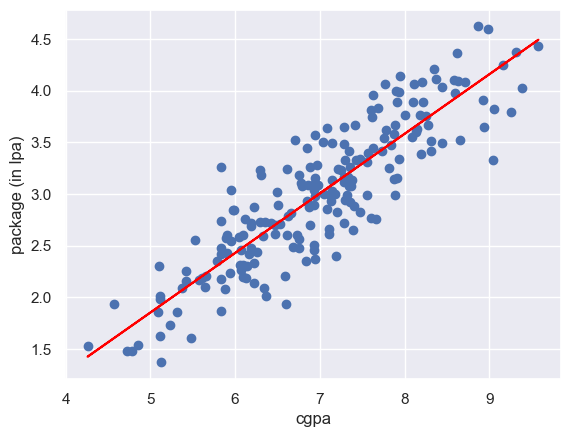

In [48]:
plt.scatter(dataset['cgpa'], dataset['package'])
plt.plot(x_train,linearmodel.predict(x_train), color='red')
plt.xlabel('cgpa')
plt.ylabel('package (in lpa)')

In [49]:
# y = mx + c
# m = slope
# c = intercept 
m = linearmodel.coef_
print(m)
c = linearmodel.intercept_
print(c)

[0.57633042]
-1.0296070415163094


In [50]:
salary = m*8.55+c
salary

array([3.89801804])

In [51]:
# cgpa = 7.23
# salary = ?
package = c + m*7.23
package

array([3.13726188])

In [52]:
# cgpa = 0
package1 = c + m*0
package1

array([-1.02960704])

# Build my own model

In [60]:
class ownmodel:
    def __init__(self):
        self.m = None
        self.c = None
    def fit(self, x_train, y_train):
        num = 0
        den = 0
        
        for i in range(x_train.shape[0]):
            num = num + ((x_train[i] - x_train.mean())*(y_train[i] - y_train.mean()))
            den = den + ((x_train[i] - x_train.mean())*(x_train[i] - x_train.mean()))
        self.m = num/den
        self.c = y_train.mean() - (self.m*x_train.mean())
        print(self.m)
        print(self.c)
    
    def predict(self, x_test):
        print(x_test)
        return self.m * x_test + self.c

In [54]:
df1 = pd.read_csv('placement.csv')
df1

cgpa  package
0    6.89     3.26
1    5.12     1.98
2    7.82     3.25
3    7.42     3.67
4    6.94     3.57
..    ...      ...
195  6.93     2.46
196  5.89     2.57
197  7.21     3.24
198  7.63     3.96
199  6.22     2.33

[200 rows x 2 columns]

In [62]:
x = df1.iloc[:,0:1].values
y = df1.iloc[:,-1].values

In [64]:
y

array([3.26, 1.98, 3.25, 3.67, 3.57, 2.99, 2.6 , 2.48, 2.31, 3.51, 1.86,
       2.6 , 3.65, 2.89, 3.42, 3.23, 2.35, 2.09, 2.98, 2.83, 3.16, 2.93,
       2.3 , 2.48, 2.71, 3.65, 3.42, 2.16, 2.24, 3.49, 3.26, 3.89, 3.08,
       2.73, 3.42, 2.87, 2.84, 2.43, 4.36, 3.33, 4.02, 2.7 , 2.54, 2.76,
       1.86, 3.58, 2.26, 3.26, 4.09, 4.62, 4.43, 3.79, 4.11, 2.61, 3.09,
       3.39, 2.74, 1.94, 3.09, 3.31, 2.19, 1.61, 2.09, 4.25, 2.92, 3.81,
       1.63, 2.89, 2.99, 2.94, 2.35, 3.34, 3.62, 4.03, 3.44, 3.28, 3.15,
       4.6 , 2.21, 3.  , 3.44, 2.2 , 2.17, 3.49, 1.53, 1.48, 2.77, 3.55,
       1.48, 2.72, 2.66, 2.14, 4.  , 3.08, 2.42, 2.79, 2.61, 2.84, 3.83,
       3.24, 4.14, 3.52, 1.37, 3.  , 3.74, 2.82, 2.19, 2.59, 3.54, 4.06,
       3.76, 2.25, 4.1 , 2.37, 1.87, 4.21, 3.33, 2.99, 2.88, 2.65, 1.73,
       3.02, 2.01, 2.3 , 2.31, 3.16, 2.6 , 3.11, 3.34, 3.12, 2.49, 2.01,
       2.48, 2.58, 2.83, 2.6 , 2.1 , 3.13, 3.89, 2.4 , 3.15, 3.18, 3.04,
       1.54, 2.42, 2.18, 2.46, 2.21, 3.4 , 3.67, 2.

In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [61]:
x_train

cgpa
134  7.20
66   5.11
26   8.31
113  6.94
168  8.65
..    ...
67   6.51
192  8.25
117  7.12
47   5.84
172  6.93

[160 rows x 1 columns]

In [66]:
lr = ownmodel()
lr.fit(x_train, y_train)

[0.57633042]
[-1.02960704]


In [67]:
y_pred = lr.predict(x_test)

[[6.94]
 [6.22]
 [6.33]
 [7.69]
 [7.09]
 [5.88]
 [7.89]
 [6.07]
 [8.94]
 [7.37]
 [5.48]
 [7.33]
 [6.19]
 [7.08]
 [7.63]
 [6.75]
 [6.35]
 [6.68]
 [5.9 ]
 [6.85]
 [7.28]
 [5.84]
 [7.87]
 [8.71]
 [5.61]
 [5.1 ]
 [7.14]
 [6.31]
 [5.12]
 [5.09]
 [6.84]
 [8.2 ]
 [6.3 ]
 [5.42]
 [6.14]
 [8.11]
 [7.29]
 [6.94]
 [8.44]
 [6.13]]
